In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
selected_data = netflix_data[['type','title','country','rating','listed_in']]

In [9]:
selected_data.head()

,type,title,country,rating,listed_in
0,Movie,Dick Johnson Is Dead,United States,PG-13,Documentaries
1,TV Show,Blood & Water,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,NaN,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,TV-MA,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [10]:
selected_data[['type','title','rating']][selected_data['country'] == 'India']

,type,title,rating
4,TV Show,Kota Factory,TV-MA
24,Movie,Jeans,TV-14
39,TV Show,Chhota Bheem,TV-Y7
50,TV Show,Dharmakshetra,TV-PG
66,TV Show,Raja Rasoi Aur Anya Kahaniyan,TV-G
...,...,...,...
8773,Movie,Yanda Kartavya Aahe,TV-PG
8775,TV Show,Yeh Meri Family,TV-PG
8798,Movie,Zed Plus,TV-MA
8799,Movie,Zenda,TV-14


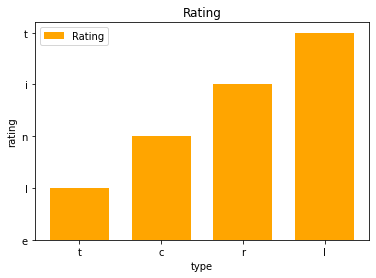

In [11]:
import matplotlib.pyplot as plt
x = []
y = []
# while selected_data['country']=='India':
#     x.append[1]
#     y.append[0]
for attribut in selected_data:
#     if selected_data['country']=="India":
    x.append(attribut[0])
    y.append(attribut[3])

plt.bar(x,y, width = 0.72, label = "Rating", color="orange")
plt.xlabel('type')
plt.ylabel('rating')
plt.title('Rating')
plt.legend()

plt.show()

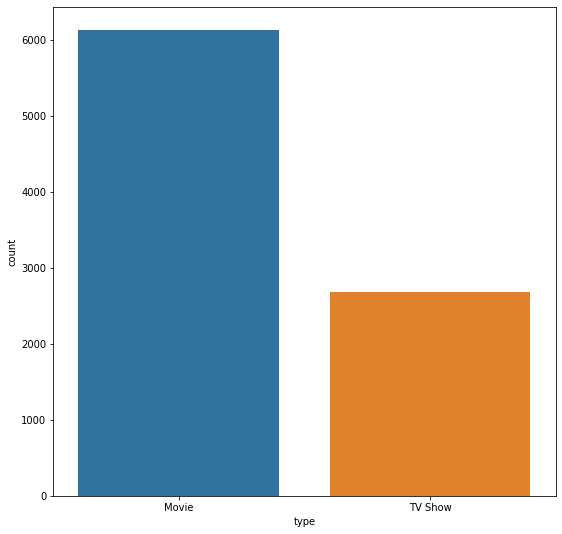

In [12]:
import seaborn as sns

plt.figure(figsize=(9,9))

x= selected_data.type.value_counts()
sns.countplot(x= "type",data= selected_data)

In [13]:
myCountry = selected_data[['type','title','rating']][selected_data['country'] == 'India']
print(myCountry)

         type                          title rating
4     TV Show                   Kota Factory  TV-MA
24      Movie                          Jeans  TV-14
39    TV Show                   Chhota Bheem  TV-Y7
50    TV Show                  Dharmakshetra  TV-PG
66    TV Show  Raja Rasoi Aur Anya Kahaniyan   TV-G
...       ...                            ...    ...
8773    Movie            Yanda Kartavya Aahe  TV-PG
8775  TV Show                Yeh Meri Family  TV-PG
8798    Movie                       Zed Plus  TV-MA
8799    Movie                          Zenda  TV-14
8806    Movie                         Zubaan  TV-14

[972 rows x 3 columns]


In [14]:
highs = myCountry[['title','rating']][myCountry['rating'] == 'TV-MA']
print(highs)

                          title rating
4                  Kota Factory  TV-MA
202           Kyaa Kool Hai Hum  TV-MA
203        Kyaa Kool Hain Hum 3  TV-MA
204    Kyaa Super Kool Hain Hum  TV-MA
206   LSD: Love, Sex Aur Dhokha  TV-MA
...                         ...    ...
8688                    Waiting  TV-MA
8713          Welcome 2 Karachi  TV-MA
8762            Wrong Side Raju  TV-MA
8769     Y.M.I.: Yeh Mera India  TV-MA
8798                   Zed Plus  TV-MA

[248 rows x 2 columns]


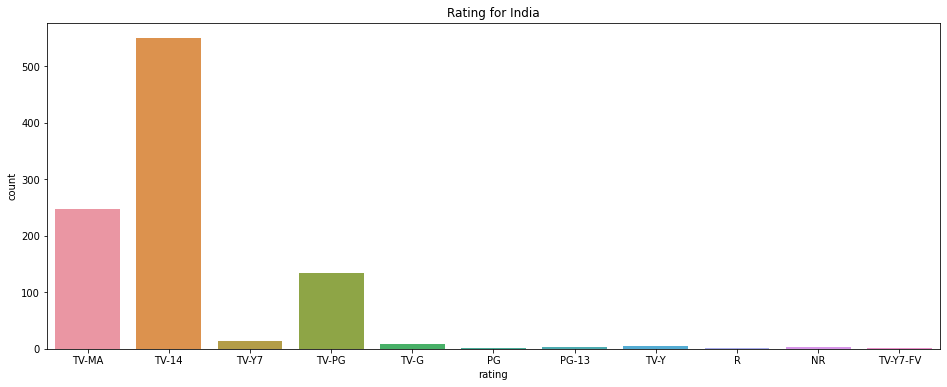

In [15]:
plt.figure(figsize=(16,6))
plt.title("Rating for India")
sns.countplot(x= "rating",data= myCountry)

**Selecting all Indian shows and movies released in the year-2021**

In [16]:
newYear = netflix_data[['type','title','country','release_year','rating']][netflix_data['release_year']== 2021][netflix_data['country'] == 'India']
print(newYear)

         type                               title country  release_year rating
4     TV Show                        Kota Factory   India          2021  TV-MA
39    TV Show                        Chhota Bheem   India          2021  TV-Y7
190     Movie                          Thimmarusu   India          2021  TV-14
297   TV Show                            Navarasa   India          2021  TV-MA
551     Movie                     Haseen Dillruba   India          2021  TV-MA
735     Movie                             Sarbath   India          2021  TV-PG
850     Movie                            99 Songs   India          2021  TV-14
871     Movie                  Sardar Ka Grandson   India          2021  TV-14
873     Movie                               Ahaan   India          2021  TV-MA
876   TV Show                        Alma Matters   India          2021  TV-MA
877     Movie                        Cinema Bandi   India          2021  TV-MA
903     Movie                             Nayattu   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# **Rating in India for year-2021**

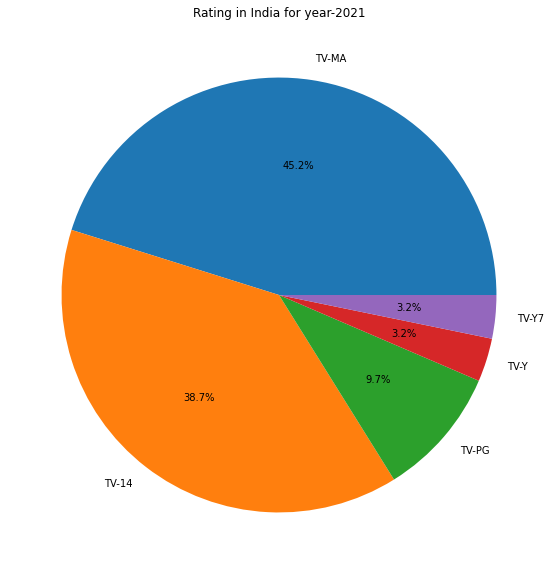

In [17]:
x= newYear.rating.value_counts()
plt.figure(figsize=(10,10))
labels= list(x.index)
plt.pie(x.values,labels= labels,autopct= "%1.1f%%")
plt.title("Rating in India for year-2021")
plt.show()

In [18]:
best1 = newYear[['type','title','rating']][newYear['rating']=='TV-MA']
print(best1)

         type                          title rating
4     TV Show                   Kota Factory  TV-MA
297   TV Show                       Navarasa  TV-MA
551     Movie                Haseen Dillruba  TV-MA
873     Movie                          Ahaan  TV-MA
876   TV Show                   Alma Matters  TV-MA
877     Movie                   Cinema Bandi  TV-MA
903     Movie                        Nayattu  TV-MA
959     Movie                   The Disciple  TV-MA
1023    Movie                Ajeeb Daastaans  TV-MA
1108    Movie                           Irul  TV-MA
1227  TV Show                  Bombay Begums  TV-MA
1265    Movie          The Girl on the Train  TV-MA
1293  TV Show                  Pitta Kathalu  TV-MA
1410    Movie  Tribhanga - Tedhi Medhi Crazy  TV-MA


# **What is most viewed in India from Tv show and Movie in the year 2021**

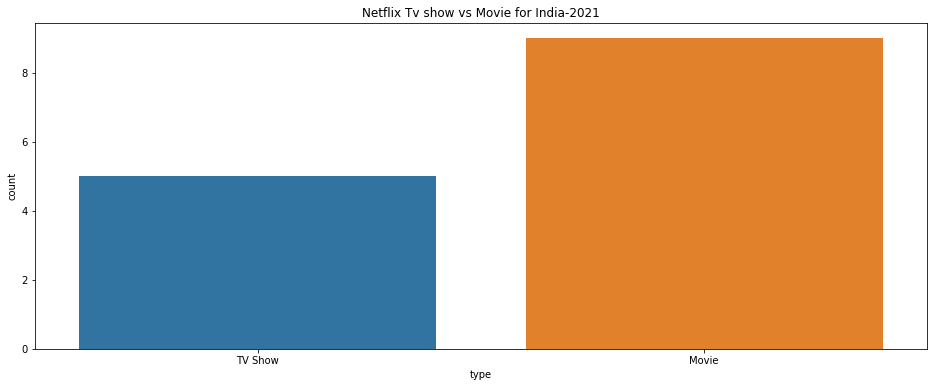

In [19]:
plt.figure(figsize=(16,6))
plt.title("Netflix Tv show vs Movie for India-2021")
sns.countplot(x= "type",data= best1)

# P.S We all love netflix